## 점진적학습 - 확률적경사하강법

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import platform

# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# 데이터 불러오기
wine = pd.read_csv('./data/08_wine.csv')

In [31]:
# alcohol : 알콜 도수
# sugar : 당도
# pH : 수소이온농도
# class : 와인종류
    # 0 : 레드와인
    # 1 : 화이트와인
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [12]:
# 데이터 전처리 - 결측치, 이상치 확인
wine.info()
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [15]:
# 상관관계 확인
wine.corr()

# 당도가 0.3의 양의 상관관계로
# 와인 종류에 영향을 끼치는 요인이 될 확률이 높다

,alcohol,sugar,pH,class
alcohol,1.000000,-0.359415,0.121248,0.032970
sugar,-0.359415,1.000000,-0.267320,0.348821
pH,0.121248,-0.267320,1.000000,-0.329129
class,0.032970,0.348821,-0.329129,1.000000


In [22]:
# 독립변수, 종속변수 분리
wine_input = wine[['alcohol', 'sugar', 'pH']]
wine_target = wine['class']

In [23]:
# 2차원 배열형태로 변환
wine_input = wine_input.to_numpy()
wine_target = wine_target.to_numpy()

In [24]:
# 훈련데이터, 테스트데이터 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(wine_input, wine_target, test_size= 0.25, random_state= 42)

In [26]:
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(4872, 3)
(4872,)
(1625, 3)
(1625,)


In [29]:
# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [30]:
print(train_scaled.shape)
print(train_target.shape)
print(test_scaled.shape)
print(test_target.shape)

(4872, 3)
(4872,)
(1625, 3)
(1625,)


In [50]:
# 로지스틱 회귀 분류 - 시그모이드
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1, max_iter=1000)
lr.fit(train_scaled, train_target)
print('로지스틱   훈련데이터 정확도:', round(lr.score(train_scaled, train_target),3))
print('로지스틱 테스트데이터 정확도:', round(lr.score(test_scaled, test_target),3))

로지스틱   훈련데이터 정확도: 0.786
로지스틱 테스트데이터 정확도: 0.766


In [41]:
# 계수 및 y절편
print(' 계수 :', lr.coef_)
print('y절편 :', lr.intercept_)

 계수 : [[ 0.53273869  1.67940585 -0.7090217 ]]
y절편 : [1.84713933]


In [63]:
# 예측 데이터 불러오기(기존데이터를 예측데이터라고 가정)
wine_pred = pd.read_csv('./data/08_wine.csv')

In [64]:
# 예측 데이터 추출
wine_pred_input = wine[['alcohol', 'sugar', 'pH']]

In [65]:
# 2차원 배열 형태로 변환
wine_pred_input = wine_pred_input.to_numpy()

In [67]:
# 정규화
wine_pred_scaled = ss.transform(wine_pred_input)

In [71]:
# 예측하기
class_pred = lr.predict(wine_pred_scaled)

In [73]:
# 예측 결과 데이터프레임 입력
wine_pred['class_pred'] = class_pred

In [76]:
# <출력결과>
wine_pred

,alcohol,sugar,pH,class,class_pred
0,9.4,1.9,3.51,0.0,0.0
1,9.8,2.6,3.20,0.0,1.0
2,9.8,2.3,3.26,0.0,1.0
3,9.8,1.9,3.16,0.0,1.0
4,9.4,1.9,3.51,0.0,0.0
...,...,...,...,...,...
6492,11.2,1.6,3.27,1.0,1.0
6493,9.6,8.0,3.15,1.0,1.0
6494,9.4,1.2,2.99,1.0,1.0
6495,12.8,1.1,3.34,1.0,1.0


In [87]:
# 정답 갯수
y_cnt = len(wine_pred[wine_pred['class'] == wine_pred['class_pred']])

# 오답 갯수
n_cnt = len(wine_pred[wine_pred['class'] != wine_pred['class_pred']])

# 전체 갯수
all_cnt = y_cnt + n_cnt

# 정답을 맟춘 갯수와 틀린갯수 출력하기
print('총 갯수 [{}]건 중에, 정답갯수[{}]건, 오답갯수[{}]건'.format(all_cnt, y_cnt, n_cnt))

print('----------------------------------------------------------------------------------')

# 정답률
y_per = round(y_cnt / all_cnt * 100 , 2)

# 오답률
n_per = round(n_cnt / all_cnt* 100 , 2)

# 전체확률(100%)
all_per = y_per + n_per

print('총 [{}%] 중에, 정답률[{}%], 오답률[{}%]'.format(all_per, y_per, n_per))

총 갯수 [6497]건 중에, 정답갯수[5073]건, 오답갯수[1424]건
----------------------------------------------------------------------------------
총 [100.0%] 중에, 정답률[78.08%], 오답률[21.92%]


## 결정트리(Decision Tree)
- 질문(조건)을 통해서 트리(True / False) 2개씩으로 가지를 치면서 분류
- 질문을 스스로 찾아서, 계속해서 질문(조건)을 만들어 나가면서 분류(트리)함
- 더이상 질문이 없으면 결정(Decision)하게 된다
- 분류 정확도가 높다
- 질문(조건)을 통해 분류해 나가는 절차를 시각화 가능하다.(장점)
- 시각화 함수 : 사이킷런 패키지 plot_tree(모델변수)

In [119]:
# 사용하는 패키지 : sklearn.tree
# 사용하는 클래스 : DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print('결정트리   훈련데이터 정확도 :', round(dt.score(train_scaled, train_target),3))
print('결정트리 테스트데이터 정확도 :', round(dt.score(test_scaled, test_target),3))

# <해석>
# 훈련데이터에 비해 테스트데이터가 낮게나왔으며
# 과소적합이 의심된다

결정트리   훈련데이터 정확도 : 0.997
결정트리 테스트데이터 정확도 : 0.852


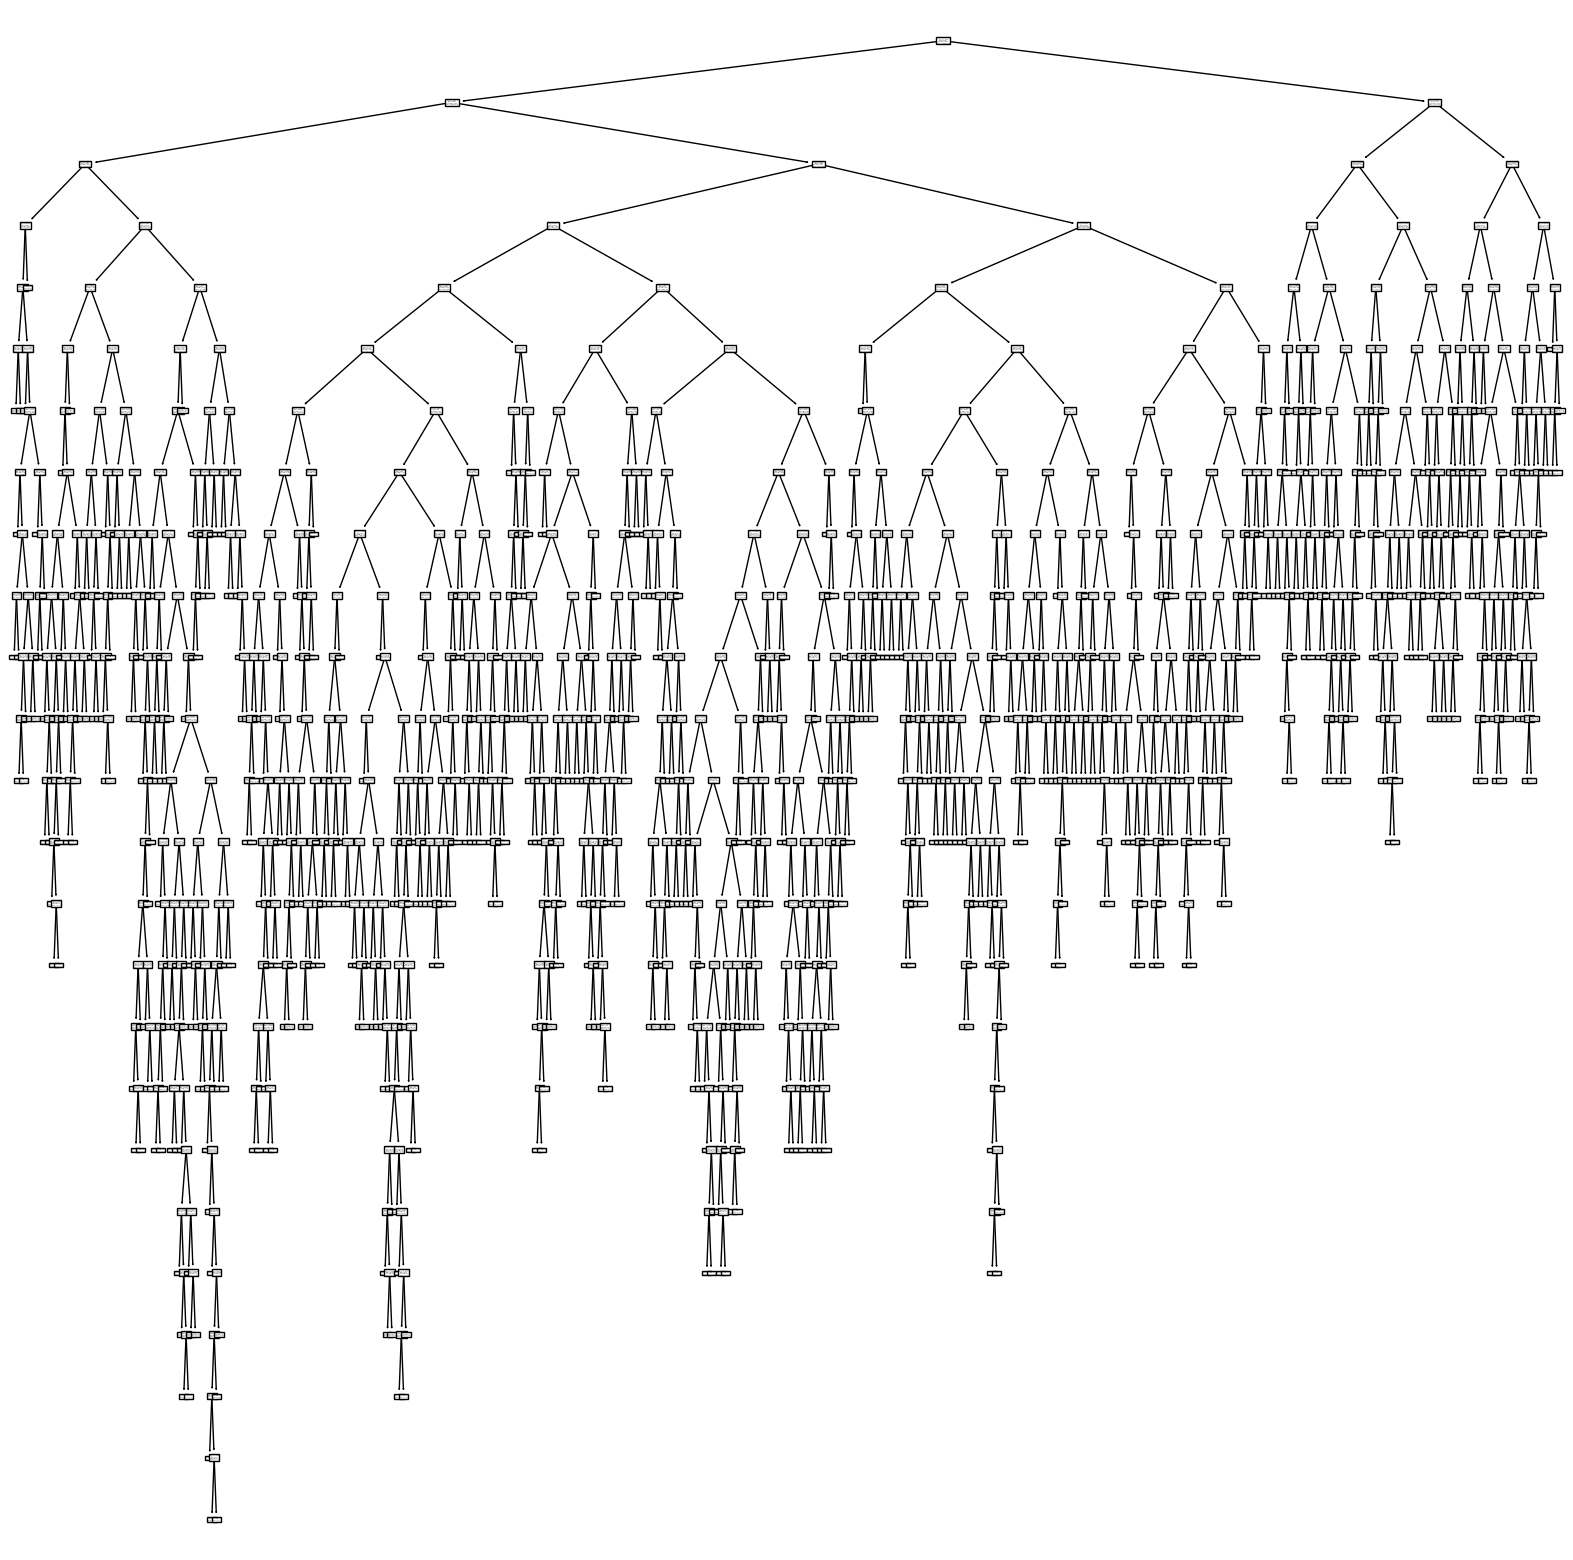

In [122]:
# 트리시각화(전체)
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20,20))
plot_tree(dt)
plt.show()

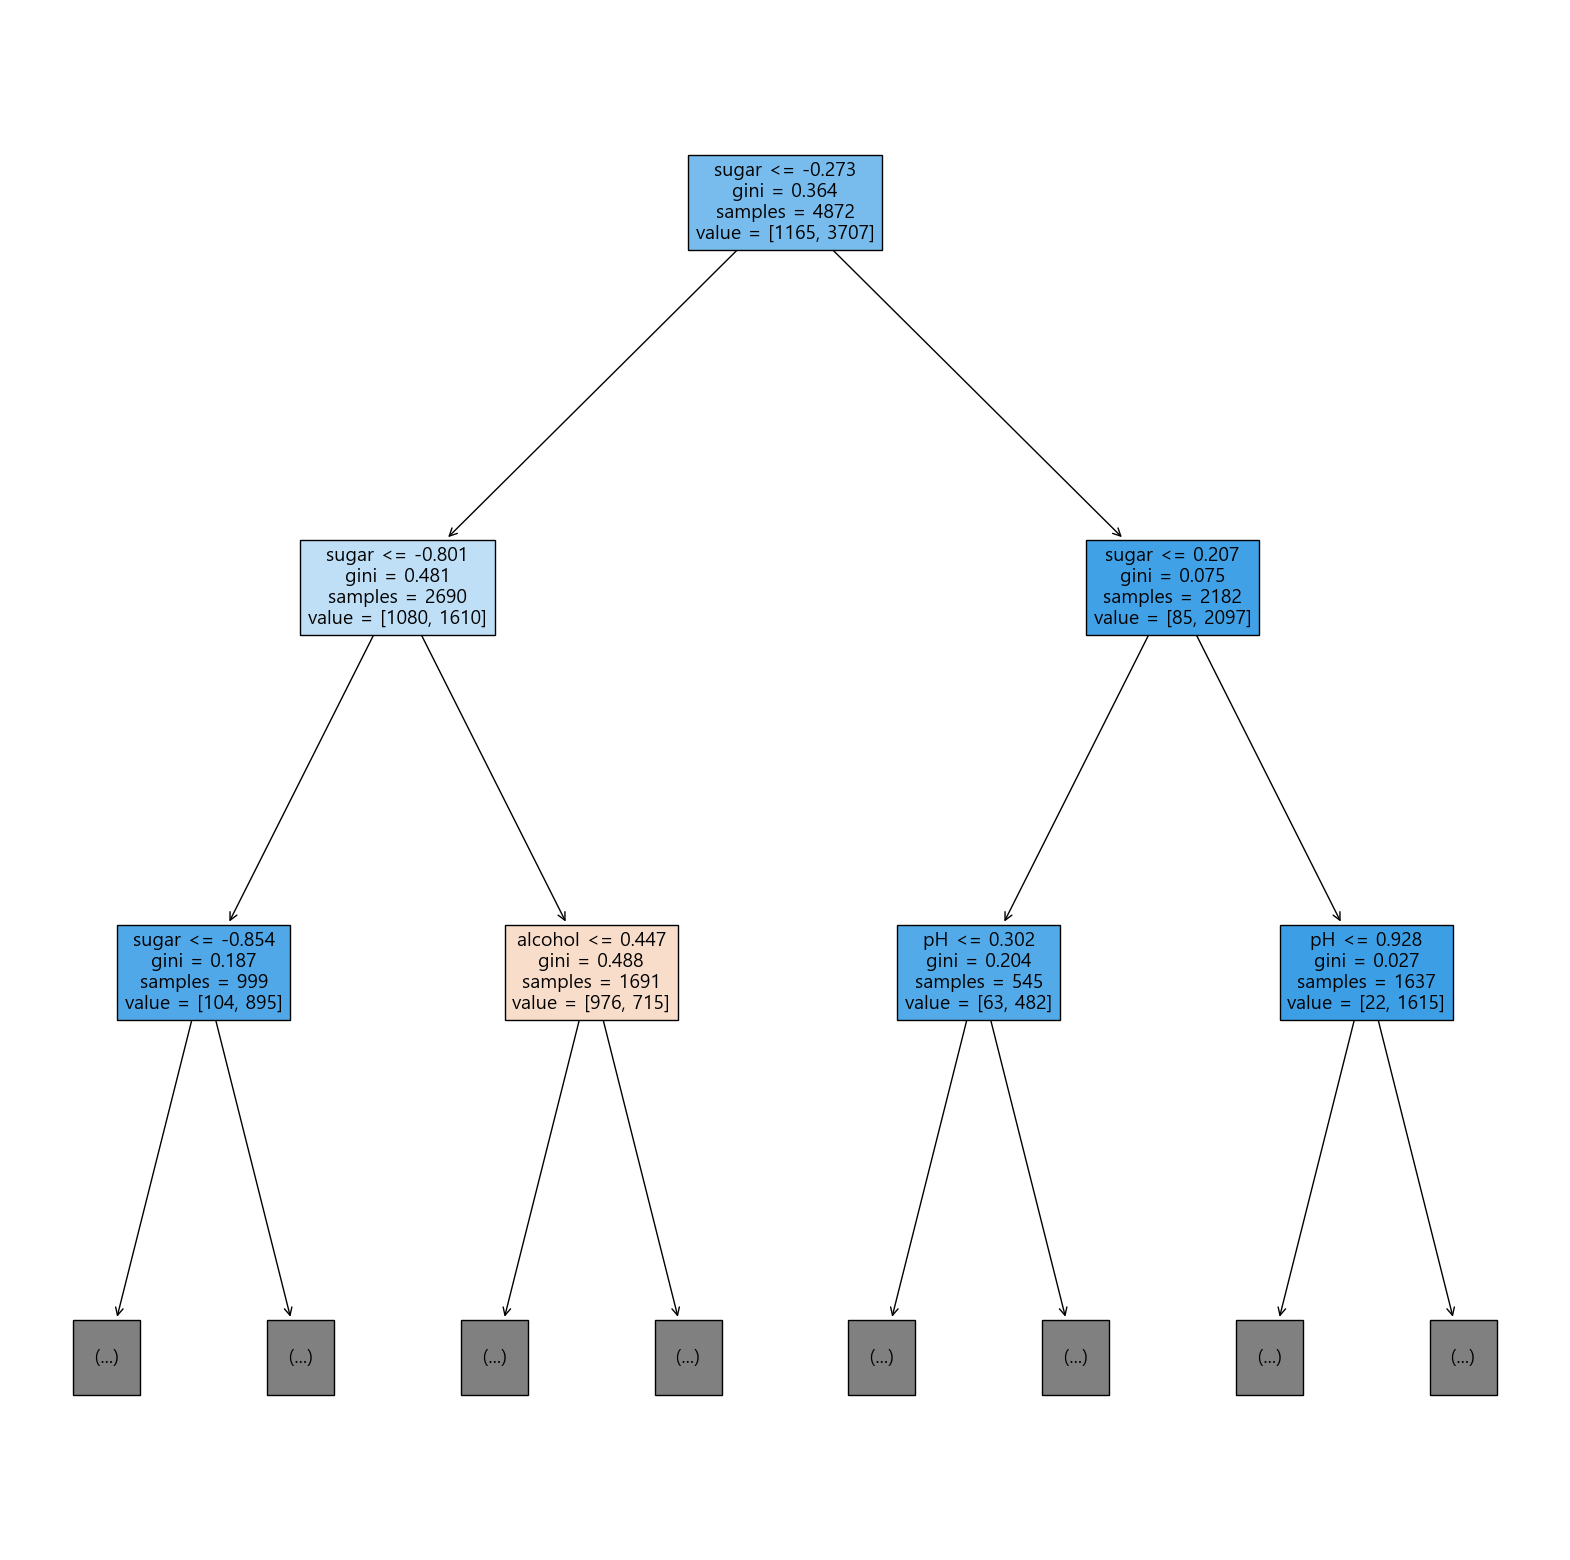

In [129]:
# 트리시각화(일부분)
from sklearn.tree import plot_tree

# max_depth : 트리의 깊이(첫번째를 제외하고 2개까지 만들기)
# filled : 독립변수별 색상 구분 여부)
# feature_names : 사용된 독립변수명

fig = plt.figure(figsize=(20,20))
plot_tree(dt, max_depth=2, filled=True,
              feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# gini : 불순도
# sample : 훈련에 사용된 총 데이터 수
# value : 범주별로 사용된(구분된) 데이터 수

# 가장 첫번째 트리 : 루트노드(root node)
# 가장 아래 트리 : 리프노드(leaf node)

## 가지치기
- max-depth : 트리의 갯수 제한
- 트리가 너무 뻗어나가도 정확도가 떨어짐
- 제한없이 뻗어나가는 것을 max_depth로 제어

In [138]:
# max-depth값 : 3
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(train_scaled, train_target)
print('결정트리   훈련데이터 정확도 :', round(dt.score(train_scaled, train_target),3))
print('결정트리 테스트데이터 정확도 :', round(dt.score(test_scaled, test_target),3))

# <해석>

결정트리   훈련데이터 정확도 : 0.85
결정트리 테스트데이터 정확도 : 0.836


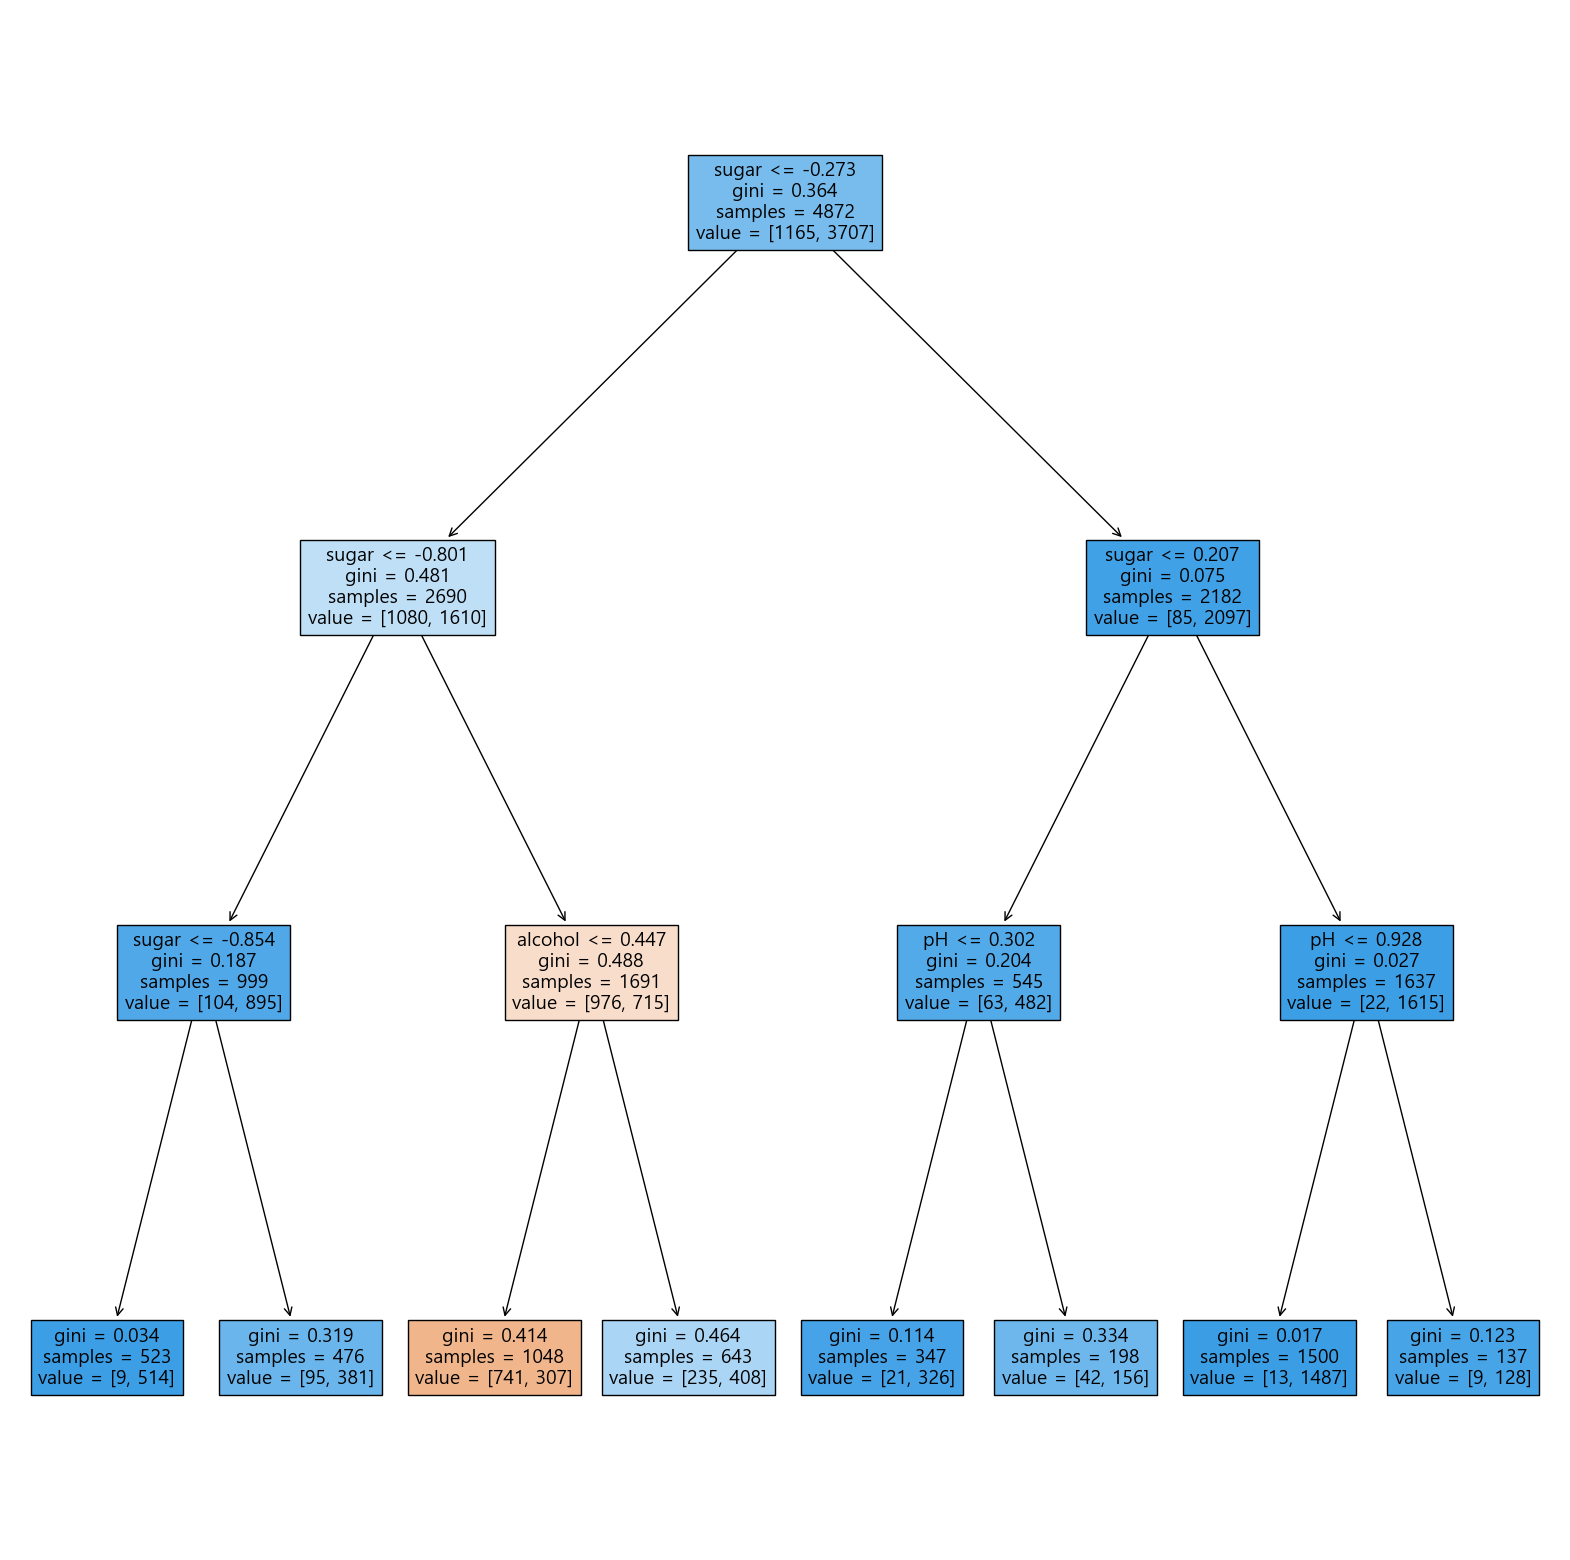

In [139]:
fig = plt.figure(figsize=(20,20))
plot_tree(dt, filled= True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## 특성 중요도

In [141]:
# 트리 훈련에 사용된 독립변수(특성=퓨처)들의 정확도 확인
    # - 정확도가 가장 높은 독립변수가 훈련에 영향을 가장 많이 미쳤다고 판단
print(dt.feature_importances_)

[0.12871631 0.86213285 0.00915084]


In [198]:
# 제일 영향이 없는 특성(ph) 제외 후 정확도 확인
wine_input_test = wine[['alcohol','sugar']]
wine_target_test = wine['class']

In [199]:
wine_input_test = wine_input_test.to_numpy()
wine_target_test = wine_target_test.to_numpy()

In [200]:
train_input_test, test_input_test, train_target_test, test_target_test = \
    train_test_split(wine_input_test, wine_target_test)

In [201]:
ss.fit(train_input_test, train_target_test)
train_scaled_test = ss.transform(train_input_test)
test_scaled_test = ss.transform(test_input_test)

In [207]:
dt_test = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_test.fit(train_scaled_test, train_target_test)
print('특성제외   훈련데이터 정확도 :', round(dt_as.score(train_scaled_test, train_target_test),3))
print('특성제외 테스트데이터 정확도 :', round(dt_as.score(test_scaled_test, test_target_test),3))

특성제외   훈련데이터 정확도 : 0.846
특성제외 테스트데이터 정확도 : 0.86


In [209]:
wine_test = pd.read_csv('./data/08_wine.csv')

In [211]:
wine_input_scaled = ss.transform(wine_input_test)

In [226]:
wine_test['class_pred'] = dt_test.predict(wine_input_scaled)
y_cnt_test = len(wine_test[wine_test['class'] == wine_test['class_pred']])
n_cnt_test = len(wine_test[wine_test['class'] != wine_test['class_pred']])
all_cnt_test = y_cnt_tset + n_cnt_test

# 정답을 맟춘 갯수와 틀린갯수 출력하기
print('총 갯수 [{}]건 중에, 정답갯수[{}]건, 오답갯수[{}]건'.format(all_cnt_test, y_cnt_test, n_cnt_test))

print('----------------------------------------------------------------------------------')

# 정답률
y_per_test = round(y_cnt_test / all_cnt_test * 100 , 2)

# 오답률
n_per_test = round(n_cnt_test / all_cnt_test * 100 , 2)

# 전체확률(100%)
all_per_test = y_per_test + n_per_test

print('총 [{}%] 중에, 정답률[{}%], 오답률[{}%]'.format(all_per_test, y_per_test, n_per_test))

총 갯수 [6497]건 중에, 정답갯수[5520]건, 오답갯수[977]건
----------------------------------------------------------------------------------
총 [100.0%] 중에, 정답률[84.96%], 오답률[15.04%]
